In [1]:
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)

y = pd.Series(iris.target, name='target')
class_names = pd.Series(iris.target, name='class')
class_names = class_names.map(dict(zip(range(3), iris.target_names)))

df = pd.concat([X, y, class_names.rename('class_name')], axis=1)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target class_name  
0       0     setosa  
1       0     setosa  
2       0     setosa  
3       0     setosa  
4       0     setosa  


In [2]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
class_name           0
dtype: int64


In [4]:
X = df.drop(["target", "class_name"], axis=1)
y = df["target"]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

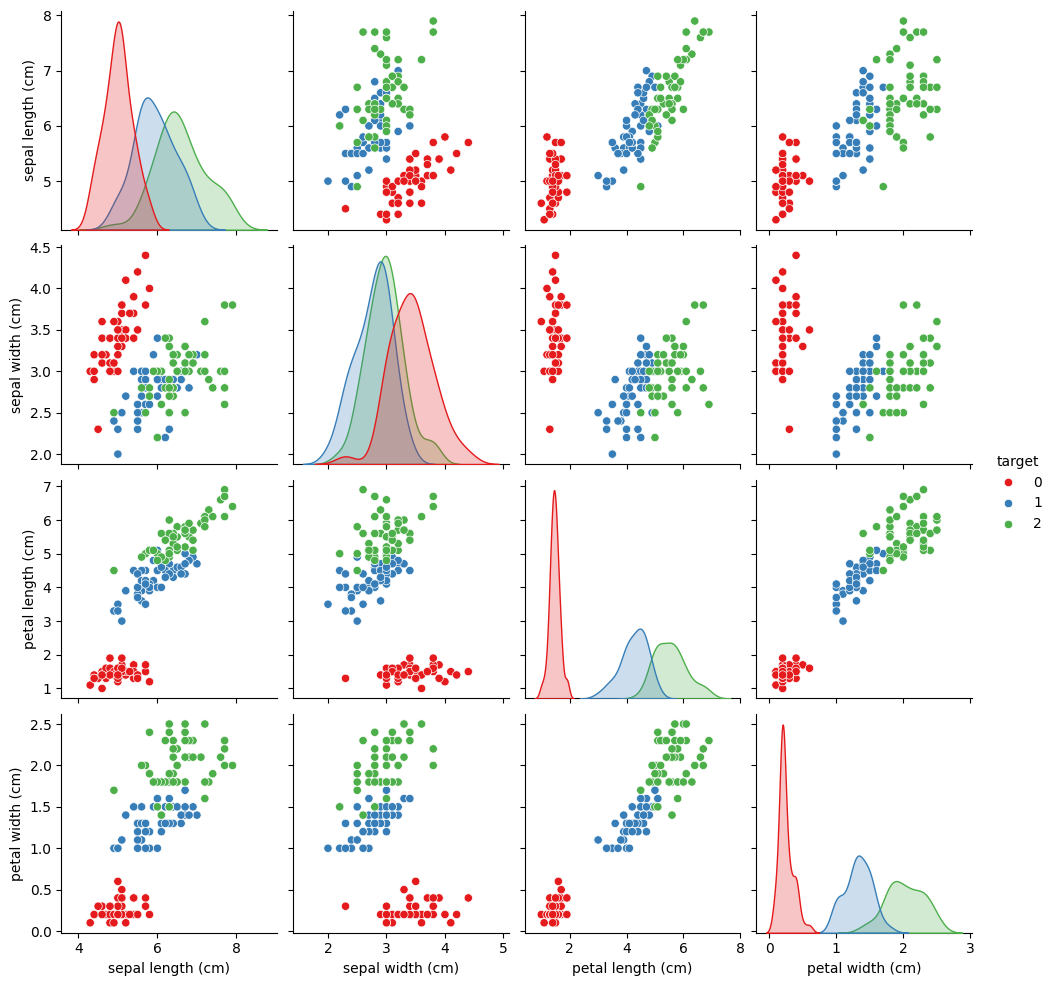

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.concat([X, y], axis=1), hue='target', palette='Set1')
plt.show()

**Método do Cotovelo**

c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

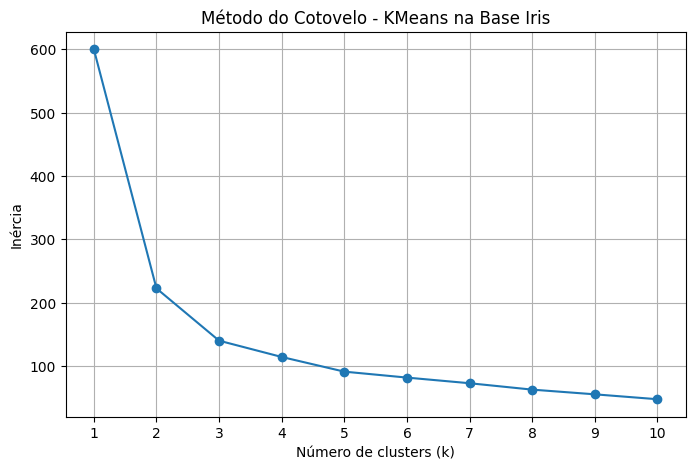

In [7]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo - KMeans na Base Iris')
plt.grid(True)
plt.xticks(K)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

y_kmeans = kmeans.labels_

In [9]:
y_true = y
df_resultado = X.copy()
df_resultado['Cluster'] = y_kmeans
df_resultado['Target'] = y_true


In [10]:
df_resultado

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [11]:
y_true

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

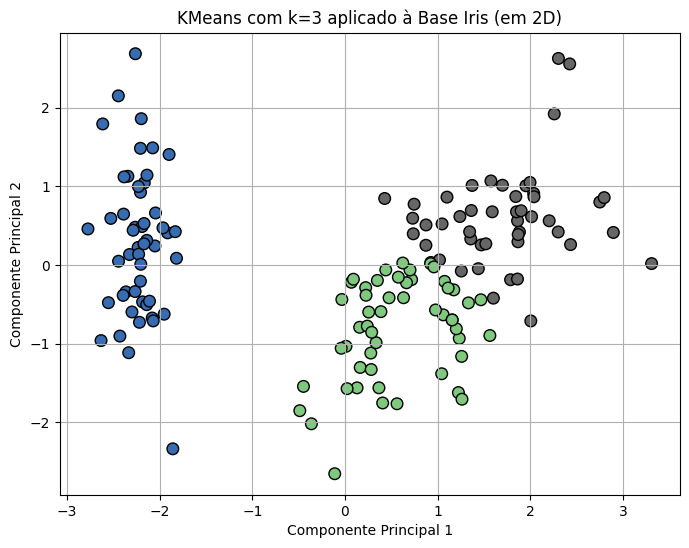

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Accent', s=70, edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans com k=3 aplicado à Base Iris (em 2D)')
plt.grid(True)
plt.show()


In [13]:
from scipy.stats import mode
import numpy as np

assert len(y_true) == len(y_kmeans), "Tamanhos diferentes!"

# 5. Mapeamento de clusters para rótulos reais
def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        labels[mask] = mode(y_true[mask], keepdims=True).mode[0]
    return labels

y_pred_mapped = map_clusters_to_labels(y_true, y_kmeans)


In [14]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, silhouette_score

acc = accuracy_score(y_true, y_pred_mapped)
ari = adjusted_rand_score(y_true, y_kmeans)
sil_score = silhouette_score(X_scaled, y_kmeans)

print(f"Acurácia (com mapeamento): {acc:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Silhouette Score: {sil_score:.2f}")

Acurácia (com mapeamento): 0.83
Adjusted Rand Index (ARI): 0.62
Silhouette Score: 0.46


In [15]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X_scaled, y_pred_mapped)

print("Davies–Bouldin Index:", dbi)

Davies–Bouldin Index: 0.8335949464754334


In [16]:
df2 = X.copy()


In [17]:
df2 = df2[['petal length (cm)', 'petal width (cm)']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

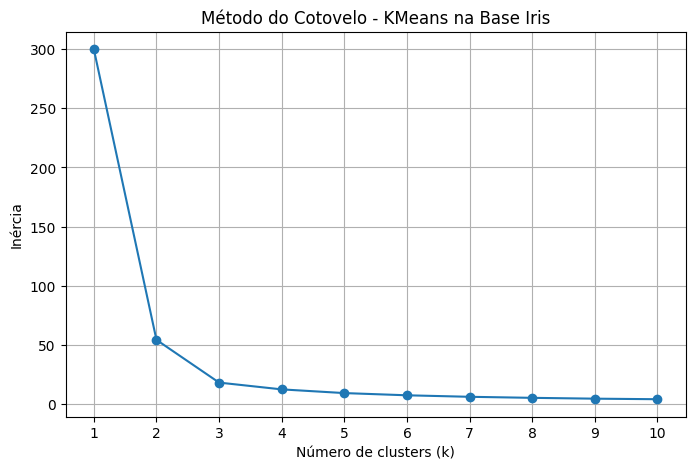

In [19]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo - KMeans na Base Iris')
plt.grid(True)
plt.xticks(K)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

y_kmeans = kmeans.labels_

c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


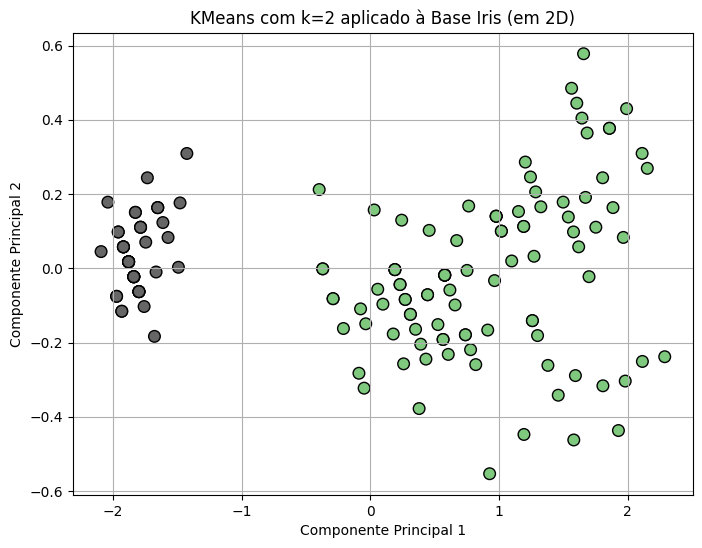

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Accent', s=70, edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans com k=2 aplicado à Base Iris (em 2D)')
plt.grid(True)
plt.show()

In [22]:
y_pred_mapped = map_clusters_to_labels(y_true, y_kmeans)


In [23]:
acc = accuracy_score(y_true, y_pred_mapped)
ari = adjusted_rand_score(y_true, y_kmeans)
sil_score = silhouette_score(X_scaled, y_kmeans)

print(f"Acurácia (com mapeamento): {acc:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Silhouette Score: {sil_score:.2f}")

Acurácia (com mapeamento): 0.67
Adjusted Rand Index (ARI): 0.57
Silhouette Score: 0.74


In [24]:
dbi = davies_bouldin_score(X_scaled, y_pred_mapped)

print("Davies–Bouldin Index:", dbi)

Davies–Bouldin Index: 0.28931949388125056


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

y_kmeans = kmeans.labels_

c:\Users\Rafaela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


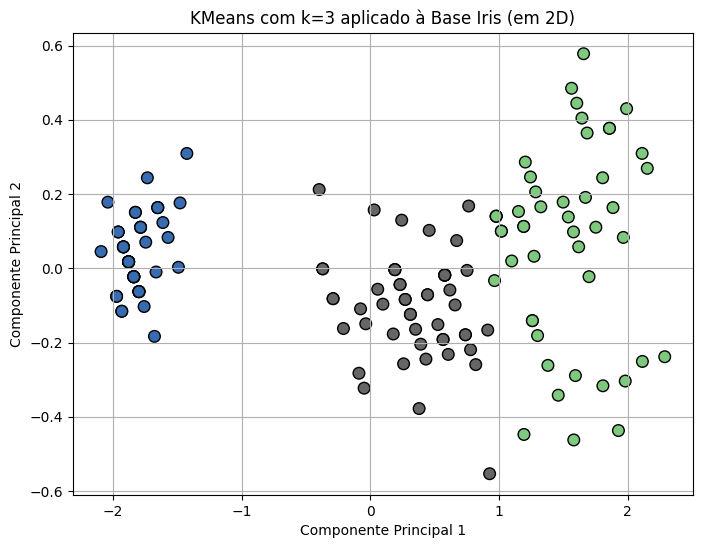

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Accent', s=70, edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans com k=3 aplicado à Base Iris (em 2D)')
plt.grid(True)
plt.show()

In [27]:
y_pred_mapped = map_clusters_to_labels(y_true, y_kmeans)


acc = accuracy_score(y_true, y_pred_mapped)
ari = adjusted_rand_score(y_true, y_kmeans)
sil_score = silhouette_score(X_scaled, y_kmeans)

print(f"Acurácia (com mapeamento): {acc:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Silhouette Score: {sil_score:.2f}")

Acurácia (com mapeamento): 0.96
Adjusted Rand Index (ARI): 0.89
Silhouette Score: 0.67


In [28]:
dbi = davies_bouldin_score(X_scaled, y_pred_mapped)

print("Davies–Bouldin Index:", dbi)

Davies–Bouldin Index: 0.4749212313453865
